In [5]:
#importing 
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)



In [6]:
df = pd.read_csv("data.csv",sep=";")
df.head(n=5)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
y = df["Target"]
X = df.loc[:,"Marital status":"GDP"]

In [10]:
#treinando o modelo
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
#melhores resultados com kernel linear
svm_model = svm.SVC(kernel = 'linear').fit(x_train,y_train)

In [11]:
#predicao

pred = svm_model.predict(x_test)

accuracy = accuracy_score(pred, y_test)
f1 = f1_score(pred, y_test, average = "weighted")

print("Acurácia: ", accuracy)
print("F1 Score: ", f1)
nomes_das_colunas = df.columns.tolist()
nomes_das_colunas.remove("Target")
nomes_das_colunas

Acurácia:  0.7593220338983051
F1 Score:  0.7727119474420164


['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation r

In [13]:
cm = confusion_matrix(y_test, pred)
#cm_df = pd.DataFrame(cm, index=nomes_das_colunas, columns=nomes_das_colunas)
#cm_df = pd.DataFrame(cm)
#sns.heatmap(cm_df, annot=True)

<AxesSubplot:>

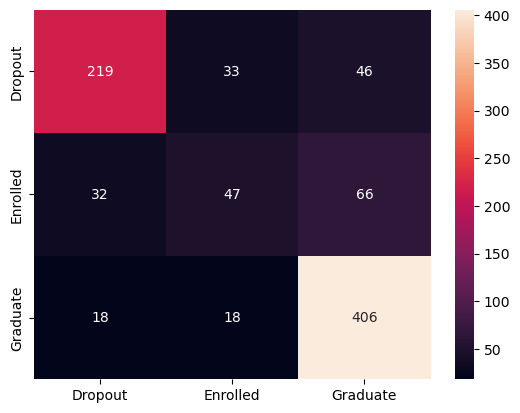

In [14]:


# Obter as classes únicas do y_test para usar como rótulos no heatmap
unique_classes = sorted(df["Target"].unique())

# Criar a matriz de confusão
cm = confusion_matrix(y_test, pred)

# Criar o DataFrame cm_df com os nomes das classes como rótulos
cm_df = pd.DataFrame(cm, index=unique_classes, columns=unique_classes)

# Criar o heatmap
sns.heatmap(cm_df, annot=True, fmt='d')
